In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

with open("data/evaluation.pickle", "rb") as f:
    data = pickle.load(f)

In [2]:
ratings = pd.read_csv("data/ml-32m/ratings.csv")
movie_descs = pd.read_csv("data/movies_with_description.csv")
ratings = ratings[ratings["movieId"].isin(movie_descs["movieId"])]
ratings = ratings[ratings["rating"] >= 5.0]

In [5]:
data.keys()

dict_keys(['users', 'user_ratings_count', 'train_movies', 'test_movies', 'correct_predictions', 'correct_predictions_weighted', 'all_predicted_movies', 'all_predict_movies_weighted'])

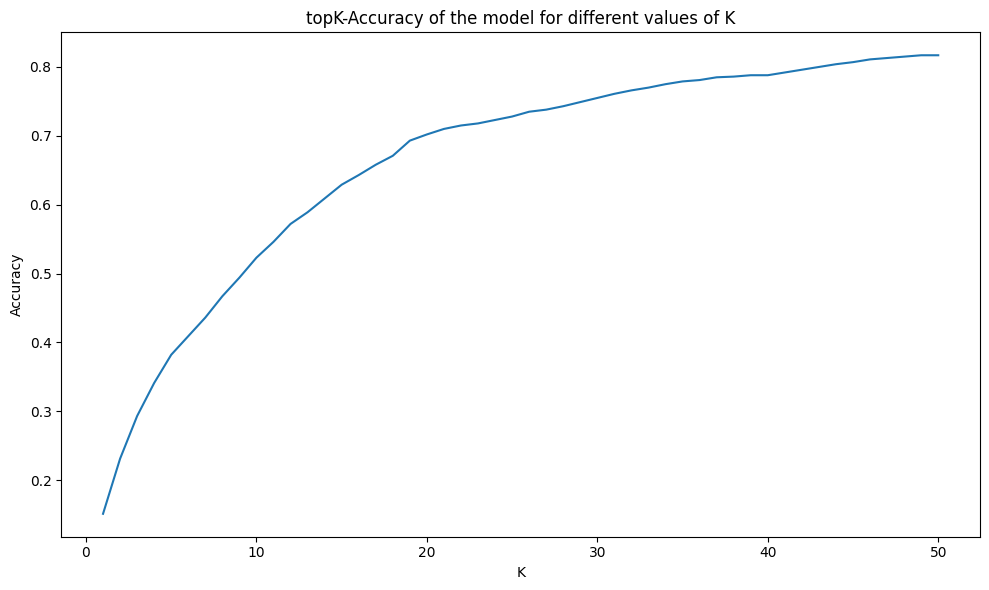

In [3]:
all_predicted_movies = data["all_predict_movies_weighted"]
test_movies = data["test_movies"]

def is_correctly_predicted(predicted_movies, test_movies, K):
    return any([movie in predicted_movies[:K] for movie in test_movies])

accuracies = []

for K in range(1, 51):
    correct = 0
    for i in range(len(all_predicted_movies)):
        if is_correctly_predicted(all_predicted_movies[i], test_movies[i], K):
            correct += 1
    accuracy = correct / len(all_predicted_movies)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), accuracies)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("topK-Accuracy of the model for different values of K")
plt.tight_layout()
plt.show()

In [27]:
with open("data/predictions_weighted.pickle", "rb") as f:
    preds_weighted = pickle.load(f)

with open("data/predictions.pickle", "rb") as f:
    preds = pickle.load(f)

In [21]:
def get_movies_watched_for_user(user_id):
    movieIds = ratings[ratings["userId"] == user_id]["movieId"].values

    return movie_descs[movie_descs["movieId"].isin(movieIds)]

def get_movie_by_ids(movie_ids: list[int]):
    return movie_descs[movie_descs["movieId"].isin(movie_ids)]

In [25]:
for user_id in preds_weighted.keys():
    print("Results for user", user_id)
    predicted_movies_for_user = preds_weighted[user_id]

    movies_watched = get_movies_watched_for_user(user_id)

    print("Movies watched by user:")
    display(movies_watched)

    print("Movies recommended to user:")
    display(get_movie_by_ids(predicted_movies_for_user[:20]))

Results for user 304
Movies watched by user:


,movieId,title,genres,imdbId,tmdbId,id,description
33,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,114814,629.0,114814,A sole survivor tells of the twisty events lea...
334,527,Schindler's List (1993),Drama|War,108052,424.0,108052,"In German-occupied Poland during World War II,..."
747,1200,Aliens (1986),Action|Adventure|Horror|Sci-Fi,90605,679.0,90605,Fifty-seven years after surviving an apocalypt...
3378,5010,Black Hawk Down (2001),Action|Drama|War,265086,855.0,265086,The story of 160 elite U.S. soldiers who dropp...
5616,8914,Primer (2004),Drama|Sci-Fi,390384,14337.0,390384,"Four friends/fledgling entrepreneurs, knowing ..."
7314,44191,V for Vendetta (2006),Action|Sci-Fi|Thriller|IMAX,434409,752.0,434409,"In a future British dystopian society, a shado..."
7584,48043,"Fountain, The (2006)",Drama|Fantasy|Romance,414993,1381.0,414993,"As a modern-day scientist, Tommy is struggling..."
8368,58559,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,468569,155.0,468569,When the menace known as the Joker wreaks havo...


Movies recommended to user:


,movieId,title,genres,imdbId,tmdbId,id,description
31,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,114369,807.0,114369,"Two detectives, a rookie and a veteran, hunt a..."
71,110,Braveheart (1995),Action|Drama|War,112573,197.0,112573,Scottish warrior William Wallace leads his cou...
163,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,76759,11.0,76759,Luke Skywalker joins forces with a Jedi Knight...
182,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,110912,680.0,110912,"The lives of two mob hitmen, a boxer, a gangst..."
369,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,103064,280.0,103064,"A cyborg, identical to the one who failed to k..."
373,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,102926,274.0,102926,A young F.B.I. cadet must receive the help of ...
382,608,Fargo (1996),Comedy|Crime|Drama|Thriller,116282,275.0,116282,Minnesota car salesman Jerry Lundegaard's inep...
528,858,"Godfather, The (1972)",Crime|Drama,68646,238.0,68646,The aging patriarch of an organized crime dyna...
743,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,80684,1891.0,80684,After the Rebels are brutally overpowered by t...
745,1198,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure,82971,85.0,82971,"In 1936, archaeologist and adventurer Indiana ..."


Results for user 6741
Movies watched by user:


,movieId,title,genres,imdbId,tmdbId,id,description
33,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,114814,629.0,114814,A sole survivor tells of the twisty events lea...
709,1136,Monty Python and the Holy Grail (1975),Adventure|Comedy|Fantasy,71853,762.0,71853,King Arthur and his Knights of the Round Table...
745,1198,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure,82971,85.0,82971,"In 1936, archaeologist and adventurer Indiana ..."
760,1215,Army of Darkness (1993),Action|Adventure|Comedy|Fantasy|Horror,106308,766.0,106308,A sardonic hardware store clerk is accidentall...
802,1270,Back to the Future (1985),Adventure|Comedy|Sci-Fi,88763,105.0,88763,"Marty McFly, a 17-year-old high school student..."
819,1291,Indiana Jones and the Last Crusade (1989),Action|Adventure,97576,89.0,97576,"In 1938, after his father Professor Henry Jone..."
1011,1610,"Hunt for Red October, The (1990)",Action|Adventure|Thriller,99810,1669.0,99810,"In November 1984, the Soviet Union's best subm..."
1262,2028,Saving Private Ryan (1998),Action|Drama|War,120815,857.0,120815,"Following the Normandy Landings, a group of U...."
2037,3147,"Green Mile, The (1999)",Crime|Drama,120689,497.0,120689,The lives of guards on Death Row are affected ...
2670,4011,Snatch (2000),Comedy|Crime|Thriller,208092,107.0,208092,"Unscrupulous boxing promoters, violent bookmak..."


Movies recommended to user:


,movieId,title,genres,imdbId,tmdbId,id,description
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,114709,A cowboy doll is profoundly threatened and jea...
31,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,114369,807.0,114369,"Two detectives, a rookie and a veteran, hunt a..."
71,110,Braveheart (1995),Action|Drama|War,112573,197.0,112573,Scottish warrior William Wallace leads his cou...
163,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,76759,11.0,76759,Luke Skywalker joins forces with a Jedi Knight...
182,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,110912,680.0,110912,"The lives of two mob hitmen, a boxer, a gangst..."
334,527,Schindler's List (1993),Drama|War,108052,424.0,108052,"In German-occupied Poland during World War II,..."
369,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,103064,280.0,103064,"A cyborg, identical to the one who failed to k..."
373,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,102926,274.0,102926,A young F.B.I. cadet must receive the help of ...
528,858,"Godfather, The (1972)",Crime|Drama,68646,238.0,68646,The aging patriarch of an organized crime dyna...
648,1036,Die Hard (1988),Action|Crime|Thriller,95016,562.0,95016,An NYPD officer tries to save his wife and sev...


Results for user 147001
Movies watched by user:


,movieId,title,genres,imdbId,tmdbId,id,description
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0,113497,When two kids find and play a magical board ga...
32,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance,114148,10530.0,114148,An English soldier and the daughter of an Algo...
71,110,Braveheart (1995),Action|Drama|War,112573,197.0,112573,Scottish warrior William Wallace leads his cou...
106,168,First Knight (1995),Action|Drama|Romance,113071,6520.0,113071,"Lancelot falls in love with Guinevere, who is ..."
127,208,Waterworld (1995),Action|Adventure|Sci-Fi,114898,9804.0,114898,In a future where the polar ice-caps have melt...
156,253,Interview with the Vampire: The Vampire Chroni...,Drama|Horror,110148,628.0,110148,"A vampire tells his epic life story: love, bet..."
222,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,110357,8587.0,110357,Lion prince Simba and his father are targeted ...
403,653,Dragonheart (1996),Action|Adventure|Fantasy,116136,8840.0,116136,The last dragon and a disillusioned dragonslay...
639,1027,Robin Hood: Prince of Thieves (1991),Adventure|Drama,102798,8367.0,102798,Robin Hood decides to fight back as an outlaw ...
1377,2174,Beetlejuice (1988),Comedy|Fantasy,94721,4011.0,94721,The spirits of a deceased couple are harassed ...


Movies recommended to user:


,movieId,title,genres,imdbId,tmdbId,id,description
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,114709,A cowboy doll is profoundly threatened and jea...
31,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,114369,807.0,114369,"Two detectives, a rookie and a veteran, hunt a..."
33,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,114814,629.0,114814,A sole survivor tells of the twisty events lea...
163,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,76759,11.0,76759,Luke Skywalker joins forces with a Jedi Knight...
182,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,110912,680.0,110912,"The lives of two mob hitmen, a boxer, a gangst..."
334,527,Schindler's List (1993),Drama|War,108052,424.0,108052,"In German-occupied Poland during World War II,..."
369,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,103064,280.0,103064,"A cyborg, identical to the one who failed to k..."
373,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,102926,274.0,102926,A young F.B.I. cadet must receive the help of ...
528,858,"Godfather, The (1972)",Crime|Drama,68646,238.0,68646,The aging patriarch of an organized crime dyna...
743,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,80684,1891.0,80684,After the Rebels are brutally overpowered by t...


In [29]:
for user_id in preds.keys():
    print("Results for user", user_id)
    predicted_movies_for_user = preds[user_id]

    movies_watched = get_movies_watched_for_user(user_id)

    print("Movies watched by user:")
    display(movies_watched)

    print("Movies recommended to user:")
    display(get_movie_by_ids(predicted_movies_for_user[:10]))

Results for user 304
Movies watched by user:


,movieId,title,genres,imdbId,tmdbId,id,description
33,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,114814,629.0,114814,A sole survivor tells of the twisty events lea...
334,527,Schindler's List (1993),Drama|War,108052,424.0,108052,"In German-occupied Poland during World War II,..."
747,1200,Aliens (1986),Action|Adventure|Horror|Sci-Fi,90605,679.0,90605,Fifty-seven years after surviving an apocalypt...
3378,5010,Black Hawk Down (2001),Action|Drama|War,265086,855.0,265086,The story of 160 elite U.S. soldiers who dropp...
5616,8914,Primer (2004),Drama|Sci-Fi,390384,14337.0,390384,"Four friends/fledgling entrepreneurs, knowing ..."
7314,44191,V for Vendetta (2006),Action|Sci-Fi|Thriller|IMAX,434409,752.0,434409,"In a future British dystopian society, a shado..."
7584,48043,"Fountain, The (2006)",Drama|Fantasy|Romance,414993,1381.0,414993,"As a modern-day scientist, Tommy is struggling..."
8368,58559,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,468569,155.0,468569,When the menace known as the Joker wreaks havo...


Movies recommended to user:


,movieId,title,genres,imdbId,tmdbId,id,description
31,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,114369,807.0,114369,"Two detectives, a rookie and a veteran, hunt a..."
163,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,76759,11.0,76759,Luke Skywalker joins forces with a Jedi Knight...
182,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,110912,680.0,110912,"The lives of two mob hitmen, a boxer, a gangst..."
373,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,102926,274.0,102926,A young F.B.I. cadet must receive the help of ...
528,858,"Godfather, The (1972)",Crime|Drama,68646,238.0,68646,The aging patriarch of an organized crime dyna...
743,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,80684,1891.0,80684,After the Rebels are brutally overpowered by t...
1656,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,133093,603.0,133093,When a beautiful stranger leads computer hacke...
3366,4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,120737,120.0,120737,A meek Hobbit from the Shire and eight compani...
4031,5952,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy,167261,121.0,167261,While Frodo and Sam edge closer to Mordor with...
4831,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,167260,122.0,167260,Gandalf and Aragorn lead the World of Men agai...


Results for user 6741
Movies watched by user:


,movieId,title,genres,imdbId,tmdbId,id,description
33,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,114814,629.0,114814,A sole survivor tells of the twisty events lea...
709,1136,Monty Python and the Holy Grail (1975),Adventure|Comedy|Fantasy,71853,762.0,71853,King Arthur and his Knights of the Round Table...
745,1198,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure,82971,85.0,82971,"In 1936, archaeologist and adventurer Indiana ..."
760,1215,Army of Darkness (1993),Action|Adventure|Comedy|Fantasy|Horror,106308,766.0,106308,A sardonic hardware store clerk is accidentall...
802,1270,Back to the Future (1985),Adventure|Comedy|Sci-Fi,88763,105.0,88763,"Marty McFly, a 17-year-old high school student..."
819,1291,Indiana Jones and the Last Crusade (1989),Action|Adventure,97576,89.0,97576,"In 1938, after his father Professor Henry Jone..."
1011,1610,"Hunt for Red October, The (1990)",Action|Adventure|Thriller,99810,1669.0,99810,"In November 1984, the Soviet Union's best subm..."
1262,2028,Saving Private Ryan (1998),Action|Drama|War,120815,857.0,120815,"Following the Normandy Landings, a group of U...."
2037,3147,"Green Mile, The (1999)",Crime|Drama,120689,497.0,120689,The lives of guards on Death Row are affected ...
2670,4011,Snatch (2000),Comedy|Crime|Thriller,208092,107.0,208092,"Unscrupulous boxing promoters, violent bookmak..."


Movies recommended to user:


,movieId,title,genres,imdbId,tmdbId,id,description
31,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,114369,807.0,114369,"Two detectives, a rookie and a veteran, hunt a..."
163,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,76759,11.0,76759,Luke Skywalker joins forces with a Jedi Knight...
182,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,110912,680.0,110912,"The lives of two mob hitmen, a boxer, a gangst..."
334,527,Schindler's List (1993),Drama|War,108052,424.0,108052,"In German-occupied Poland during World War II,..."
373,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,102926,274.0,102926,A young F.B.I. cadet must receive the help of ...
528,858,"Godfather, The (1972)",Crime|Drama,68646,238.0,68646,The aging patriarch of an organized crime dyna...
743,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,80684,1891.0,80684,After the Rebels are brutally overpowered by t...
755,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi,86190,1892.0,86190,After a daring mission to rescue Han Solo from...
1656,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,133093,603.0,133093,When a beautiful stranger leads computer hacke...
2338,3578,Gladiator (2000),Action|Adventure|Drama,172495,98.0,172495,A former Roman General sets out to exact venge...


Results for user 147001
Movies watched by user:


,movieId,title,genres,imdbId,tmdbId,id,description
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0,113497,When two kids find and play a magical board ga...
32,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance,114148,10530.0,114148,An English soldier and the daughter of an Algo...
71,110,Braveheart (1995),Action|Drama|War,112573,197.0,112573,Scottish warrior William Wallace leads his cou...
106,168,First Knight (1995),Action|Drama|Romance,113071,6520.0,113071,"Lancelot falls in love with Guinevere, who is ..."
127,208,Waterworld (1995),Action|Adventure|Sci-Fi,114898,9804.0,114898,In a future where the polar ice-caps have melt...
156,253,Interview with the Vampire: The Vampire Chroni...,Drama|Horror,110148,628.0,110148,"A vampire tells his epic life story: love, bet..."
222,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,110357,8587.0,110357,Lion prince Simba and his father are targeted ...
403,653,Dragonheart (1996),Action|Adventure|Fantasy,116136,8840.0,116136,The last dragon and a disillusioned dragonslay...
639,1027,Robin Hood: Prince of Thieves (1991),Adventure|Drama,102798,8367.0,102798,Robin Hood decides to fight back as an outlaw ...
1377,2174,Beetlejuice (1988),Comedy|Fantasy,94721,4011.0,94721,The spirits of a deceased couple are harassed ...


Movies recommended to user:


,movieId,title,genres,imdbId,tmdbId,id,description
163,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,76759,11.0,76759,Luke Skywalker joins forces with a Jedi Knight...
182,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,110912,680.0,110912,"The lives of two mob hitmen, a boxer, a gangst..."
373,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,102926,274.0,102926,A young F.B.I. cadet must receive the help of ...
743,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,80684,1891.0,80684,After the Rebels are brutally overpowered by t...
745,1198,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure,82971,85.0,82971,"In 1936, archaeologist and adventurer Indiana ..."
755,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi,86190,1892.0,86190,After a daring mission to rescue Han Solo from...
802,1270,Back to the Future (1985),Adventure|Comedy|Sci-Fi,88763,105.0,88763,"Marty McFly, a 17-year-old high school student..."
1656,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,133093,603.0,133093,When a beautiful stranger leads computer hacke...
2338,3578,Gladiator (2000),Action|Adventure|Drama,172495,98.0,172495,A former Roman General sets out to exact venge...
10097,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,1375666,27205.0,1375666,A thief who steals corporate secrets through t...
